Handwriten digit recognition

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the MNIST dataset

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
## load_data-->return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
print(test_digits.shape)

(10000, 28, 28)


In [5]:
print(train_labels.shape)

(60000,)


In [6]:
type(train_labels)

numpy.ndarray

In [7]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(test_labels).value_counts()


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

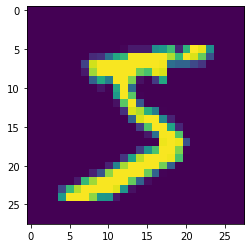

In [11]:
plt.imshow(train_digits[0])


Text(0.5, 1.0, 'Digit5')

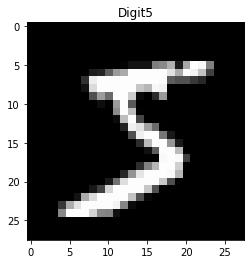

In [9]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit"+str(train_labels[0]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

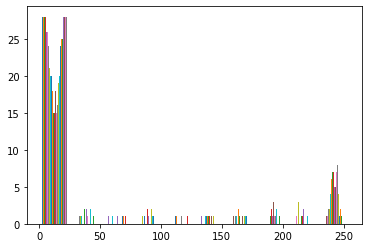

In [12]:
plt.hist(train_digits[0])


(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

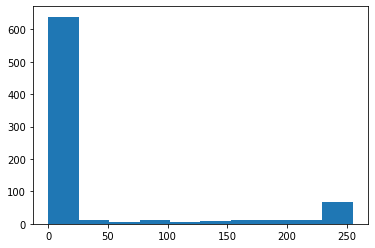

In [13]:
plt.hist(train_digits[0].flat)


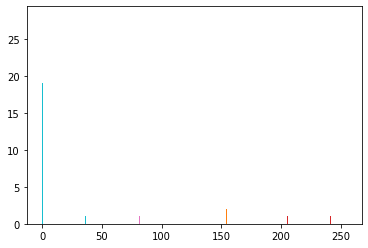

In [14]:
plt.hist(train_digits[0],bins=255)
plt.show()

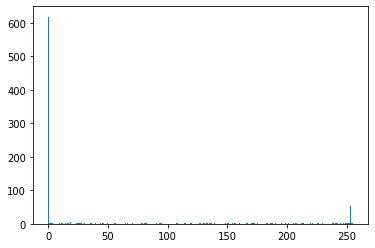

In [15]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

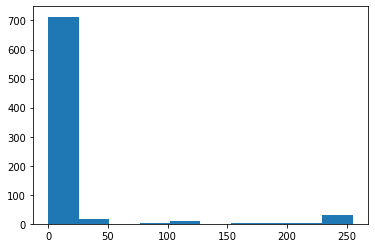

In [16]:

# Pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [17]:
train_digits[0][5:10,22:25]


array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [18]:
train_labels[10:20]


array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

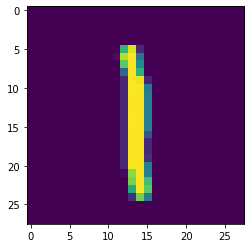

In [19]:
plt.imshow(train_digits[14])


In [20]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([45949,  9383, 47768, 50036, 44656, 28337, 27986,  4544, 21825,
       40663, 46023, 28042, 10628, 34083, 44039, 58615])

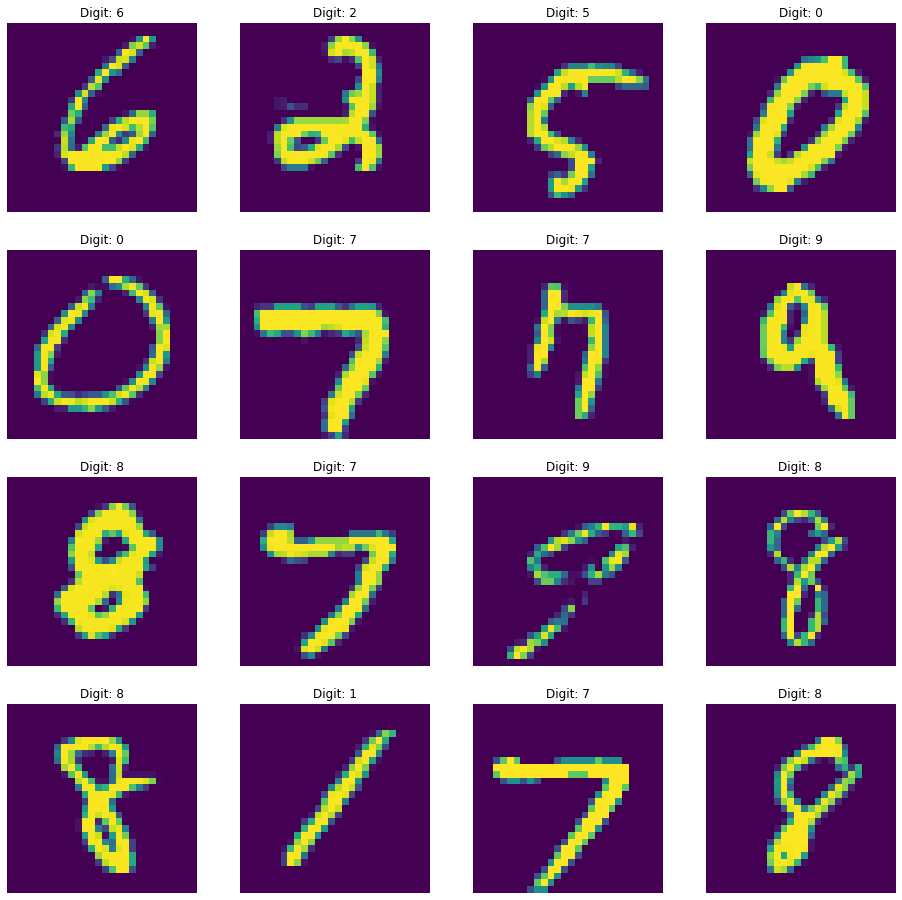

In [21]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

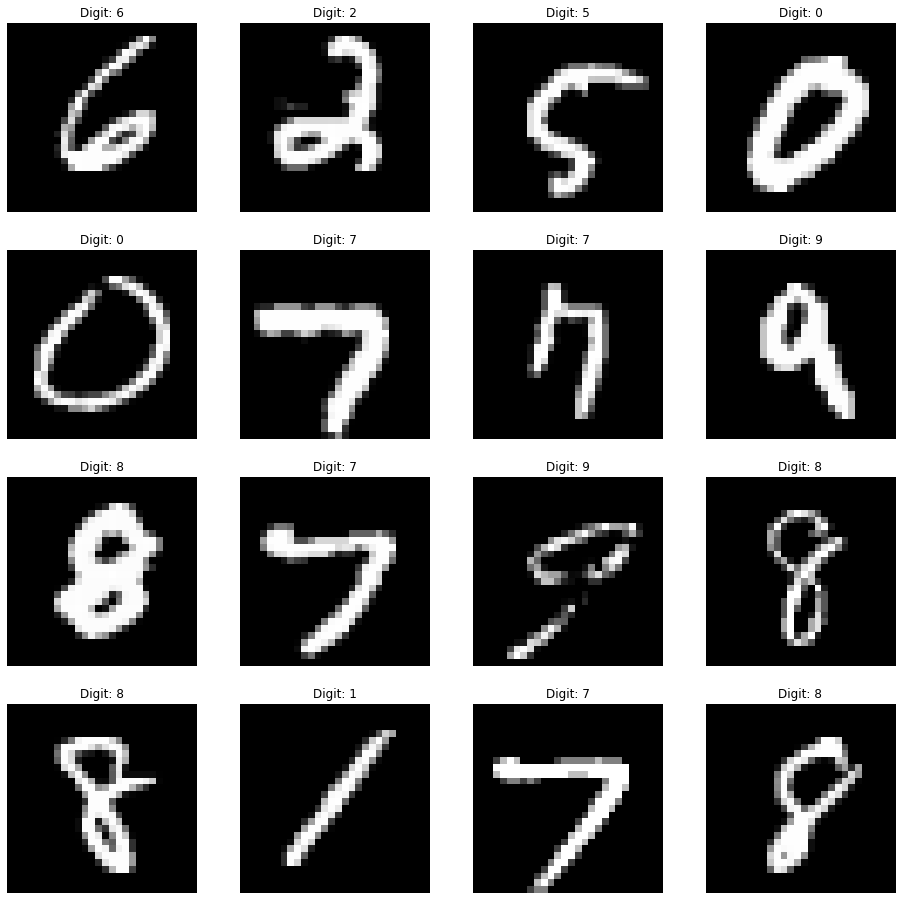

In [22]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

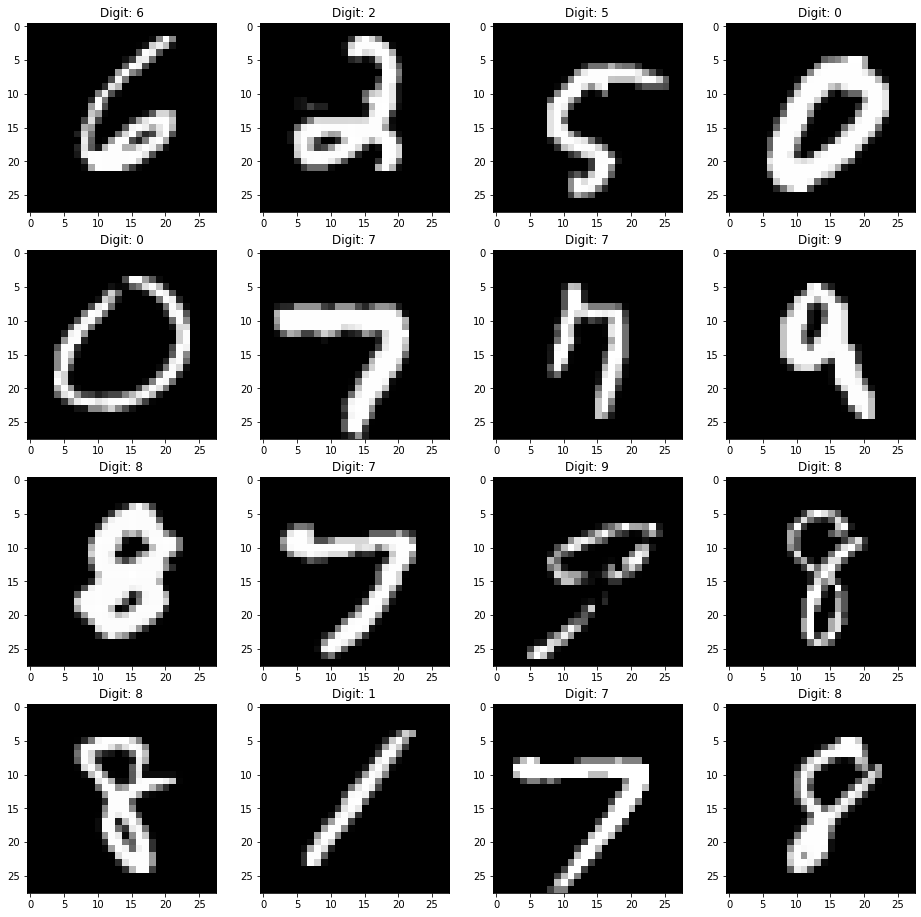

In [23]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  #plt.axis("off")
  j+=1

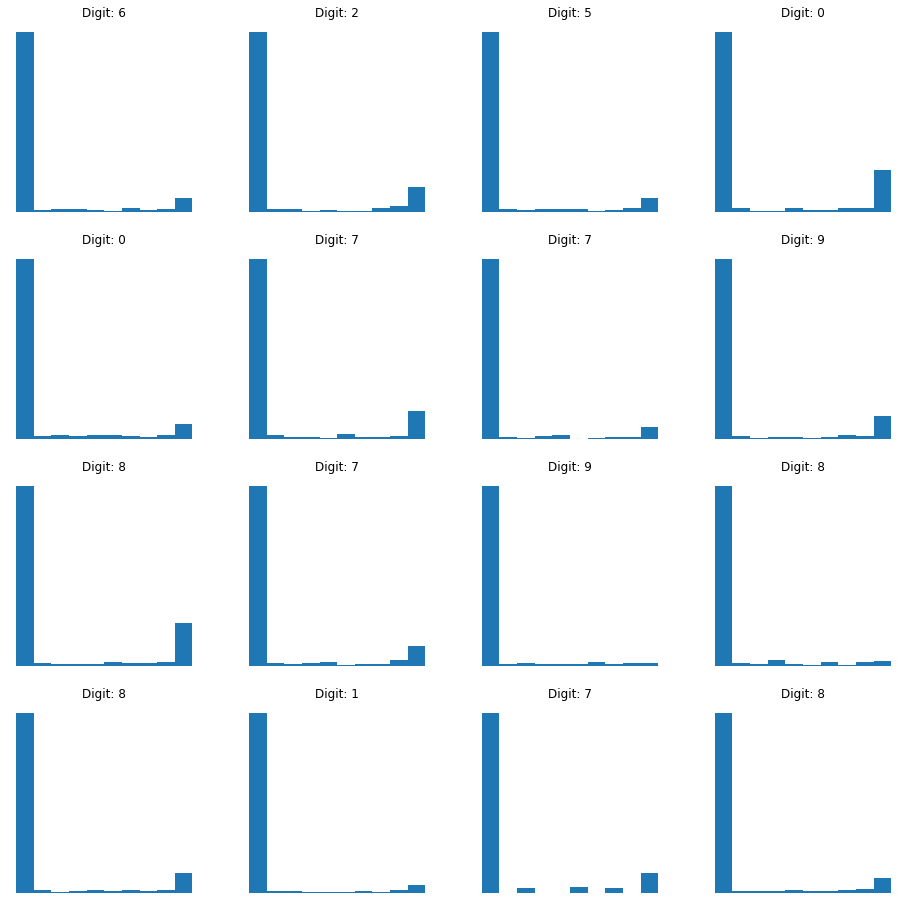

In [24]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

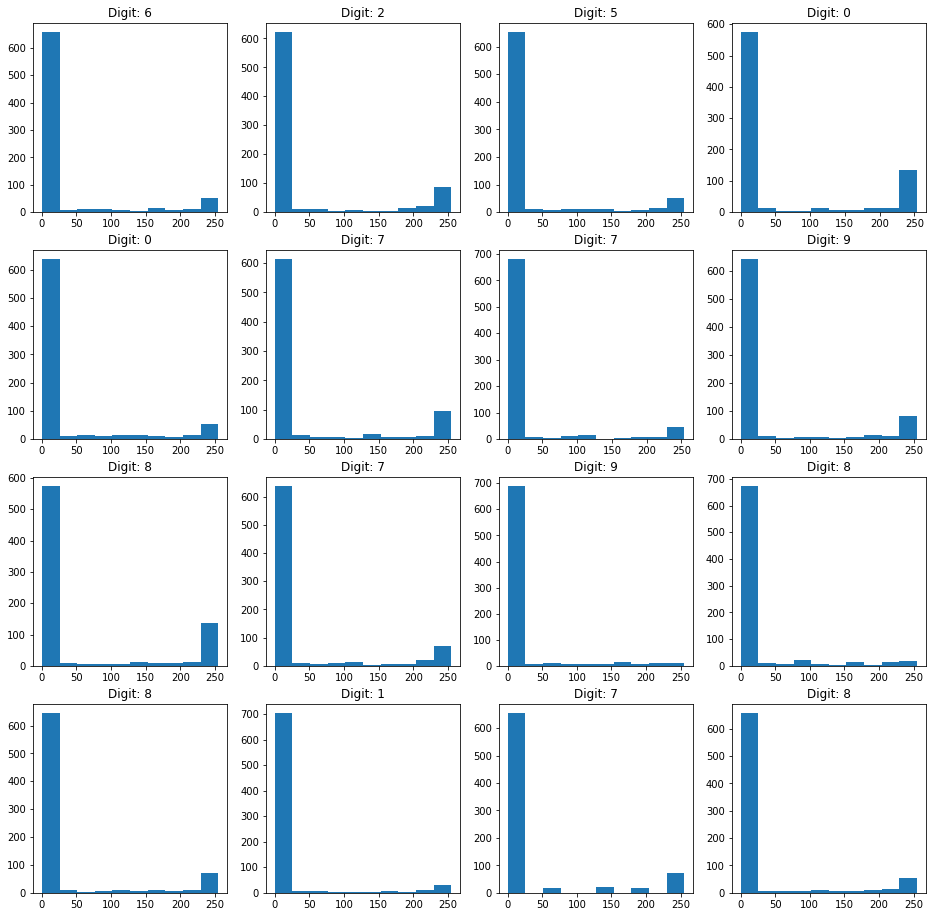

In [25]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
 # plt.axis("off")
  j+=1

In [26]:
## pixel  values are from 0 to 255
train_digits_sc = train_digits/255.0
test_digits_sc = test_digits/255.0

In [27]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
from keras.utils import to_categorical


In [29]:
train_labels_cat = to_categorical(train_labels)


In [30]:
train_labels_cat[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:

test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [35]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [36]:
## We are creating the base model
model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [37]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [38]:
history=model.fit(x=X_train,y=y_train,epochs=10,\
          validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 121us/step - loss: 0.2507 - accuracy: 0.9227 - val_loss: 0.1591 - val_accuracy: 0.9530
Epoch 2/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.1131 - accuracy: 0.9651 - val_loss: 0.1094 - val_accuracy: 0.9710
Epoch 3/10
54000/54000 [==============================] - 6s 113us/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.1479 - val_accuracy: 0.9598
Epoch 4/10
54000/54000 [==============================] - 6s 112us/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.1050 - val_accuracy: 0.9703
Epoch 5/10
54000/54000 [==============================] - 6s 113us/step - loss: 0.0522 - accuracy: 0.9829 - val_loss: 0.1215 - val_accuracy: 0.9680
Epoch 6/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.1045 - val_accuracy: 0.9728
Epoch 7/10
54000/54000 [==============================] - 6s 11

In [39]:
model.evaluate(test_digits_sc,test_labels_cat)


10000/10000 [==============================] - 0s 36us/step


[0.1056425640757201, 0.9761999845504761]

In [40]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [41]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))


array([[3.3184916e-10, 2.1957858e-08, 2.0273690e-07, 9.5460848e-08,
        2.1788246e-10, 1.7717191e-11, 6.4536064e-14, 9.9999535e-01,
        6.3822196e-09, 4.2626293e-06]], dtype=float32)

In [42]:
model.predict(test_digits_sc[:10])


array([[3.3184983e-10, 2.1957815e-08, 2.0273728e-07, 9.5461033e-08,
        2.1788288e-10, 1.7717191e-11, 6.4536308e-14, 9.9999535e-01,
        6.3822196e-09, 4.2626298e-06],
       [3.3607517e-10, 9.9239037e-12, 1.0000000e+00, 3.1259890e-09,
        1.8278504e-10, 5.9868375e-13, 8.1221905e-13, 6.6653716e-10,
        2.0274091e-11, 6.4508513e-15],
       [3.5915697e-09, 9.9999511e-01, 2.6848949e-07, 1.0880482e-08,
        5.3779718e-07, 1.6096230e-09, 1.2844867e-08, 7.4149006e-07,
        3.3349318e-06, 7.6878752e-09],
       [9.9999988e-01, 1.5048832e-13, 2.5418812e-09, 1.2415542e-11,
        2.1249414e-11, 8.8314611e-10, 8.5040675e-08, 2.1577252e-11,
        2.6991713e-11, 4.1944119e-09],
       [2.3512804e-12, 5.8855584e-08, 2.2314062e-08, 1.9584420e-10,
        9.9991691e-01, 4.0604151e-09, 3.4160138e-08, 5.6093450e-09,
        1.1930993e-08, 8.2929779e-05],
       [6.7745365e-11, 9.9998367e-01, 4.4993271e-08, 7.9361966e-09,
        1.9132747e-07, 1.4655945e-10, 7.2429132e-11, 1.46

In [43]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])

In [44]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))


array([[3.3184916e-10, 2.1957858e-08, 2.0273690e-07, 9.5460848e-08,
        2.1788246e-10, 1.7717191e-11, 6.4536064e-14, 9.9999535e-01,
        6.3822196e-09, 4.2626293e-06]], dtype=float32)

In [45]:
dir(history)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [46]:
history.history


{'accuracy': [0.92266667,
  0.9650556,
  0.9749445,
  0.9795,
  0.9829074,
  0.9862593,
  0.9874074,
  0.98955554,
  0.9904815,
  0.99164814],
 'loss': [0.25074017549664884,
  0.11305756462648235,
  0.08216495042853057,
  0.06574641217524185,
  0.05224367096315621,
  0.04429896060965472,
  0.04053664935940308,
  0.0336342336903725,
  0.03013965823305221,
  0.02737938211874576],
 'val_accuracy': [0.953000009059906,
  0.9710000157356262,
  0.9598333239555359,
  0.9703333377838135,
  0.9679999947547913,
  0.9728333353996277,
  0.971833348274231,
  0.9704999923706055,
  0.9753333330154419,
  0.9753333330154419],
 'val_loss': [0.1591237547894319,
  0.10938247444232305,
  0.14785795769964655,
  0.10502353270134578,
  0.12150846721169849,
  0.10453844261456591,
  0.11312691625781979,
  0.12270657313498669,
  0.11445668545198472,
  0.12139772663490536]}

In [47]:
history.history.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

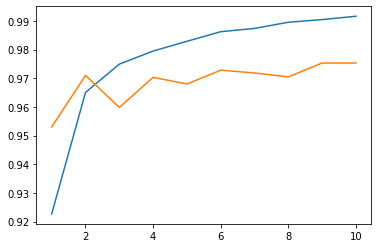

In [48]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])